# **Visão Geral**

As redes sociais desempenham um papel importante nas interações pessoais até estratégias de marketing, campanhas políticas e ações de mobilização social.

Um dos principais indicadores de sucesso de uma publicação é o **engajamento**. Compreender (e até mesmo prever) o engajamento de postagens se tornou uma tarefa estratégica em várias áreas e é um bom desafios para a área de inteligência artificial.

Na segunda parte de atividades de avaliação da disciplina de I.A., os é compartilhado um conjunto de dados contendo publicações anônimas em redes sociais com os seguintes atributos:

* `anon_id`: identificador anonimizado do autor
* `content`: conteúdo textual do post
* `reactions`: número de reações recebidas
* `comments`: número de comentários
* `engagement`: classificação binária (`high` ou `low`)

Com base nesse conjunto, serão realizadas três atividades.

In [ ]:
#!gdown 19Y-NdpOTCfmtlM66FqodAtiZMs8lGQTq

In [1]:
import pandas as pd

df = pd.read_pickle('./data/df_social_data_train.pkl')
df

,anon_id,content,reactions,comments,score,engagement
0,afb338bc4e80e811be481b27807934c5,Robert Lerman writes that achieving a healthy...,12,1,13,low
1,afb338bc4e80e811be481b27807934c5,"National disability advocate Sara Hart Weir, ...",11,0,11,low
2,afb338bc4e80e811be481b27807934c5,NaN,15,0,15,low
3,afb338bc4e80e811be481b27807934c5,Exploring in this months Talent Management & H...,44,0,44,low
4,afb338bc4e80e811be481b27807934c5,I count myself fortunate to have spent time wi...,22,2,24,low
...,...,...,...,...,...,...
23803,ecc9ab53ac5a897358b35118221ea367,Check out my interview with @AaronBerson ! I w...,5,0,5,low
23804,ecc9ab53ac5a897358b35118221ea367,Check out my interview with @MikeMax32CPA abou...,3,0,3,low
23805,ecc9ab53ac5a897358b35118221ea367,Love! #radicalcpa,76,3,79,low
23806,ecc9ab53ac5a897358b35118221ea367,Did you know next year is going to be the best...,1,0,1,low


<Axes: >

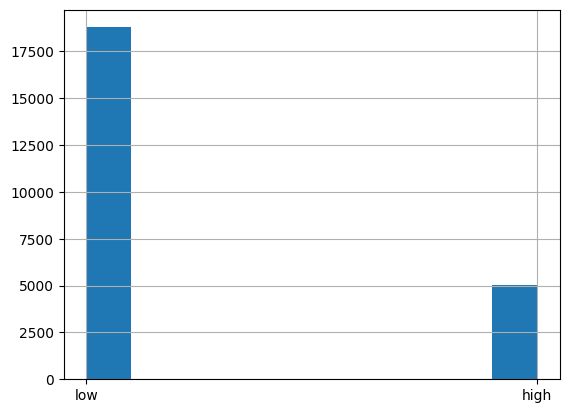

In [2]:
df.engagement.hist()



---

## **Atividade 1 — Classificação Supervisionada**

Nesta atividade, você deve **comparar quatro diferentes paradigmas de aprendizado de máquina**: probabilísticos, simbólicos, conexionistas e estatísticos.

> **Importante:** Durante a **etapa de inferência**, o modelo **só poderá utilizar o conteúdo textual** (`content`) do post para prever o engajamento. Informações como `reactions` e `comments` devem ser utilizadas apenas na etapa de treinamento, se desejar, mas não podem ser usadas como entrada no momento da predição de novos posts (eles não estarão disponíveis em inferência).

Para avaliação, será disponibilizado um arquivo de teste contendo **novas postagens sem o rótulo de engajamento**, e cada aluno deverá submeter suas **previsões finais de engajamento** para essas novas entradas.

In [ ]:
# pre-processar e extrair caracteristicas dos dados para construir a tabela atributo-valor
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

df = df.dropna()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/704 [00:00<?, ?it/s]

ValueError: Expected a 1D array, got an array with shape (22513, 384)

In [ ]:
df['features'] = list(model.encode(df['content'].tolist(), show_progress_bar=True))

df

Batches:   0%|          | 0/704 [00:00<?, ?it/s]

<ipython-input-7-71f9341b8164>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['features'] = list(model.encode(df['content'].tolist(), show_progress_bar=True))


,anon_id,content,reactions,comments,score,engagement,features
0,afb338bc4e80e811be481b27807934c5,Robert Lerman writes that achieving a healthy...,12,1,13,low,"[-0.011695284, 0.02785928, 0.036047444, -0.030..."
1,afb338bc4e80e811be481b27807934c5,"National disability advocate Sara Hart Weir, ...",11,0,11,low,"[-0.026237324, -0.06488707, -0.00786377, 0.097..."
3,afb338bc4e80e811be481b27807934c5,Exploring in this months Talent Management & H...,44,0,44,low,"[-0.023109002, -0.020342559, 0.035548184, -0.0..."
4,afb338bc4e80e811be481b27807934c5,I count myself fortunate to have spent time wi...,22,2,24,low,"[-0.054384463, 0.0031936867, -0.06155944, 0.01..."
5,afb338bc4e80e811be481b27807934c5,Online job platforms are a different way of wo...,21,1,22,low,"[-0.068378225, -0.062780656, -0.010365994, -0...."
...,...,...,...,...,...,...,...
23803,ecc9ab53ac5a897358b35118221ea367,Check out my interview with @AaronBerson ! I w...,5,0,5,low,"[-0.07402999, 0.008327069, 0.0050208783, 0.041..."
23804,ecc9ab53ac5a897358b35118221ea367,Check out my interview with @MikeMax32CPA abou...,3,0,3,low,"[-0.039110135, 0.0067848046, -0.011407465, 0.0..."
23805,ecc9ab53ac5a897358b35118221ea367,Love! #radicalcpa,76,3,79,low,"[-0.06677414, -0.011888947, 0.0026476763, -0.0..."
23806,ecc9ab53ac5a897358b35118221ea367,Did you know next year is going to be the best...,1,0,1,low,"[-0.07542417, 0.017530885, 0.023634885, -0.043..."


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,test_size=0.3)

In [ ]:
df_train

,anon_id,content,reactions,comments,score,engagement,features
22226,57992d10738a3905a132f9d2d0b0544f,To the Wharton Executive Education community...,22,3,25,low,"[-0.027432766, -0.04541528, 0.042667944, 0.021..."
10875,57c3606d8c2045ee4d12e5bda3bc00c0,Building a Venture-Scale #MarTech #Company ...,0,0,0,low,"[0.032662783, -0.05336408, -0.016813137, -0.01..."
8061,e9a5747880379170a53a736ba79282ee,These are 12 things I learned from the DAYTRAD...,70,5,75,low,"[0.071705885, 0.03492421, 0.0069539896, 0.0479..."
3730,6dd12a8b69751cd80f9a645d42dcc49c,"Our new e-book, Stories Behind Digital Health ...",100,6,106,low,"[-0.02455189, 0.031955164, 0.009105892, -0.051..."
18146,906ebd03d53ec6863aa38b0449e9060d,This is Procter & Gamble 's response to erodi...,7,6,13,low,"[-0.059640188, -0.032266907, 0.031522173, -0.0..."
...,...,...,...,...,...,...,...
16043,33b7a00344a9963da684b57ae8a9320c,Really love this post. I'm hoping we're on the...,23,0,23,low,"[-0.043334883, 0.031711508, 0.013007092, -0.04..."
13634,4cac481e40d95a8508829e56d99c1f0f,Want 2 more hours this week? Download my 99 Pr...,57,0,57,low,"[-0.053449076, -0.032725554, 0.038053434, 0.02..."
1722,c9b35f2df6bb4348e654f01d81a733bc,"In business, I've heard repeatedly that leader...",318,8,326,high,"[0.08384899, 0.06417011, -0.018879006, -0.0374..."
7802,e9a5747880379170a53a736ba79282ee,"I gave up careers, relationships, huge opportu...",501,40,541,high,"[0.016379286, 0.017076937, 0.03922124, 0.05270..."


In [ ]:
df_test

,anon_id,content,reactions,comments,score,engagement,features
10627,57c3606d8c2045ee4d12e5bda3bc00c0,Wonder how to accelerate your #startup ? Let'...,10,1,11,low,"[-0.016998265, -0.09632136, -0.011177093, -0.0..."
15871,33b7a00344a9963da684b57ae8a9320c,Can we stop calling companies tech companies n...,3554,408,3962,high,"[-0.07526045, -0.017265579, 0.057842042, -0.05..."
9638,57c3606d8c2045ee4d12e5bda3bc00c0,What type of exit multiples are #VCs looking...,11,0,11,low,"[-0.00073606585, -0.007914867, -0.03770791, -0..."
23759,ecc9ab53ac5a897358b35118221ea367,#radicalcpa ❤️ this! #cpa #cpafirm #acc...,7,0,7,low,"[-0.033179957, 0.040441215, -0.03797919, 0.022..."
22522,46f5eaf6d0fffd8b1b4cd917c2bb6657,"What will coronavirus mean for the economy, an...",30,2,32,low,"[0.0067533897, 0.0032441944, 0.020806568, 0.03..."
...,...,...,...,...,...,...,...
17142,95333d14cb84443736fd874c4efb3339,"""That’s when I decided, to truly understand sa...",0,0,0,low,"[-0.10721916, 0.1017113, -0.011689889, -0.0762..."
19348,062c6788d2daa73b11fb6348a51e8efb,Global Press Journal is uniquely positioned t...,16,2,18,low,"[-0.006529209, 0.041292675, -0.011930284, 0.04..."
2105,96ccc6fdf97b890e2d0187c620bd6d57,Reducing patient quality of care: Why are we g...,49,1,50,low,"[-0.05391153, 0.071326, 0.025702322, -0.001950..."
5496,b1c8682c66bb56c6ab1126ee86ae2b02,Fantastic to hear how Census Life have taken...,825,17,842,high,"[-0.06285132, -0.028898189, 0.01913896, 0.0359..."


<Axes: >

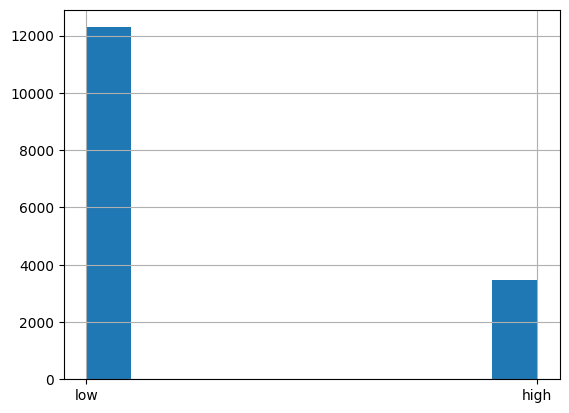

In [ ]:
df_train.engagement.hist()

<Axes: >

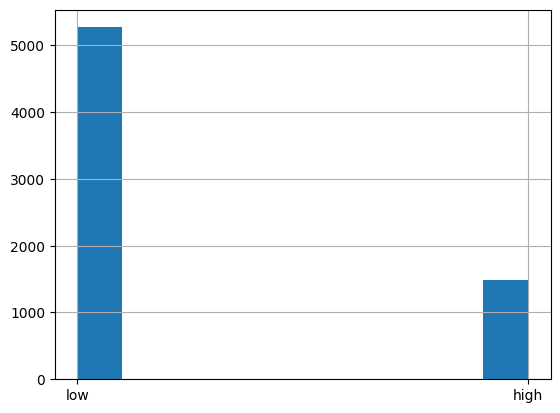

In [ ]:
df_test.engagement.hist()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,metric="cosine")
knn.fit(df_train.features.to_list(), df_train.engagement.to_list())
y_pred = knn.predict(df_test.features.to_list())

In [ ]:
df_test['engagement_pred'] = y_pred

In [ ]:
df_test

,anon_id,content,reactions,comments,score,engagement,features,engagement_pred
10627,57c3606d8c2045ee4d12e5bda3bc00c0,Wonder how to accelerate your #startup ? Let'...,10,1,11,low,"[-0.016998265, -0.09632136, -0.011177093, -0.0...",low
15871,33b7a00344a9963da684b57ae8a9320c,Can we stop calling companies tech companies n...,3554,408,3962,high,"[-0.07526045, -0.017265579, 0.057842042, -0.05...",high
9638,57c3606d8c2045ee4d12e5bda3bc00c0,What type of exit multiples are #VCs looking...,11,0,11,low,"[-0.00073606585, -0.007914867, -0.03770791, -0...",low
23759,ecc9ab53ac5a897358b35118221ea367,#radicalcpa ❤️ this! #cpa #cpafirm #acc...,7,0,7,low,"[-0.033179957, 0.040441215, -0.03797919, 0.022...",low
22522,46f5eaf6d0fffd8b1b4cd917c2bb6657,"What will coronavirus mean for the economy, an...",30,2,32,low,"[0.0067533897, 0.0032441944, 0.020806568, 0.03...",low
...,...,...,...,...,...,...,...,...
17142,95333d14cb84443736fd874c4efb3339,"""That’s when I decided, to truly understand sa...",0,0,0,low,"[-0.10721916, 0.1017113, -0.011689889, -0.0762...",low
19348,062c6788d2daa73b11fb6348a51e8efb,Global Press Journal is uniquely positioned t...,16,2,18,low,"[-0.006529209, 0.041292675, -0.011930284, 0.04...",low
2105,96ccc6fdf97b890e2d0187c620bd6d57,Reducing patient quality of care: Why are we g...,49,1,50,low,"[-0.05391153, 0.071326, 0.025702322, -0.001950...",low
5496,b1c8682c66bb56c6ab1126ee86ae2b02,Fantastic to hear how Census Life have taken...,825,17,842,high,"[-0.06285132, -0.028898189, 0.01913896, 0.0359...",high


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df_test.engagement.to_list(), df_test.engagement_pred.to_list()))



              precision    recall  f1-score   support

        high       0.55      0.45      0.49      1484
         low       0.85      0.90      0.87      5270

    accuracy                           0.80      6754
   macro avg       0.70      0.67      0.68      6754
weighted avg       0.79      0.80      0.79      6754



In [ ]:
# no codigo acima, testamos apenas uma divisao de treino e teste;
# e usamos parametros default do knn.
# vamos agora usar validacao cruzada e tentar otimizar os parametros.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# parameters = {
#     'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
#     'metric':['euclidean','manhattan','cosine'],
#     'weights':['uniform','distance']
# }


parameters = {
    'n_neighbors':[1,3,7],
    'metric':['cosine'],
    'weights':['uniform','distance']
}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters,verbose=3)
clf.fit(df_train.features.to_list(), df_train.engagement.to_list())


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END metric=cosine, n_neighbors=1, weights=uniform;, score=0.773 total time=   1.0s
[CV 2/5] END metric=cosine, n_neighbors=1, weights=uniform;, score=0.765 total time=   0.9s
[CV 3/5] END metric=cosine, n_neighbors=1, weights=uniform;, score=0.771 total time=   0.9s
[CV 4/5] END metric=cosine, n_neighbors=1, weights=uniform;, score=0.773 total time=   1.3s
[CV 5/5] END metric=cosine, n_neighbors=1, weights=uniform;, score=0.765 total time=   1.6s
[CV 1/5] END metric=cosine, n_neighbors=1, weights=distance;, score=0.773 total time=   0.8s
[CV 2/5] END metric=cosine, n_neighbors=1, weights=distance;, score=0.765 total time=   0.8s
[CV 3/5] END metric=cosine, n_neighbors=1, weights=distance;, score=0.771 total time=   0.8s
[CV 4/5] END metric=cosine, n_neighbors=1, weights=distance;, score=0.773 total time=   0.8s
[CV 5/5] END metric=cosine, n_neighbors=1, weights=distance;, score=0.765 total time=   0.8s
[CV 1/5] END me

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['cosine'], 'n_neighbors': [1, 3, 7],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [ ]:
print(clf.best_params_)

{'metric': 'cosine', 'n_neighbors': 7, 'weights': 'distance'}


In [ ]:
y_pred = clf.predict(df_test.features.to_list())
df_test['engagement_pred'] = y_pred

print(classification_report(df_test.engagement.to_list(), df_test.engagement_pred.to_list()))

              precision    recall  f1-score   support

        high       0.61      0.38      0.47      1484
         low       0.84      0.93      0.89      5270

    accuracy                           0.81      6754
   macro avg       0.73      0.66      0.68      6754
weighted avg       0.79      0.81      0.79      6754



## **Atividade 2 — Aprendizado não Supervisionado**

Nesta atividade, você deve utilizar **métodos de aprendizado não supervisionado** vistos em sala de aula, como **k-means** ou **redes SOM**, para **identificar padrões nos dados de engajamento**.

O objetivo é compreender **quais tópicos, padrões ou grupos de postagens** estão mais associados a alto ou baixo engajamento.

In [ ]:
import pandas as pd

df = pd.read_pickle('df_social_data_train.pkl')
df

,anon_id,content,reactions,comments,score,engagement
0,afb338bc4e80e811be481b27807934c5,Robert Lerman writes that achieving a healthy...,12,1,13,low
1,afb338bc4e80e811be481b27807934c5,"National disability advocate Sara Hart Weir, ...",11,0,11,low
2,afb338bc4e80e811be481b27807934c5,NaN,15,0,15,low
3,afb338bc4e80e811be481b27807934c5,Exploring in this months Talent Management & H...,44,0,44,low
4,afb338bc4e80e811be481b27807934c5,I count myself fortunate to have spent time wi...,22,2,24,low
...,...,...,...,...,...,...
23803,ecc9ab53ac5a897358b35118221ea367,Check out my interview with @AaronBerson ! I w...,5,0,5,low
23804,ecc9ab53ac5a897358b35118221ea367,Check out my interview with @MikeMax32CPA abou...,3,0,3,low
23805,ecc9ab53ac5a897358b35118221ea367,Love! #radicalcpa,76,3,79,low
23806,ecc9ab53ac5a897358b35118221ea367,Did you know next year is going to be the best...,1,0,1,low


In [ ]:
# pre-processar e extrair caracteristicas dos dados para construir a tabela atributo-valor
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

df = df.dropna()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
df['features'] = list(model.encode(df['content'].tolist(), show_progress_bar=True))

df

Batches:   0%|          | 0/704 [00:00<?, ?it/s]

<ipython-input-5-1892182183>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['features'] = list(model.encode(df['content'].tolist(), show_progress_bar=True))


,anon_id,content,reactions,comments,score,engagement,features
0,afb338bc4e80e811be481b27807934c5,Robert Lerman writes that achieving a healthy...,12,1,13,low,"[-0.011695284, 0.02785928, 0.036047444, -0.030..."
1,afb338bc4e80e811be481b27807934c5,"National disability advocate Sara Hart Weir, ...",11,0,11,low,"[-0.02623733, -0.06488712, -0.007863777, 0.097..."
3,afb338bc4e80e811be481b27807934c5,Exploring in this months Talent Management & H...,44,0,44,low,"[-0.023109002, -0.020342559, 0.035548184, -0.0..."
4,afb338bc4e80e811be481b27807934c5,I count myself fortunate to have spent time wi...,22,2,24,low,"[-0.054384463, 0.0031936867, -0.06155944, 0.01..."
5,afb338bc4e80e811be481b27807934c5,Online job platforms are a different way of wo...,21,1,22,low,"[-0.068378225, -0.062780656, -0.010365994, -0...."
...,...,...,...,...,...,...,...
23803,ecc9ab53ac5a897358b35118221ea367,Check out my interview with @AaronBerson ! I w...,5,0,5,low,"[-0.074029945, 0.008327099, 0.005020871, 0.041..."
23804,ecc9ab53ac5a897358b35118221ea367,Check out my interview with @MikeMax32CPA abou...,3,0,3,low,"[-0.039110135, 0.0067848046, -0.011407465, 0.0..."
23805,ecc9ab53ac5a897358b35118221ea367,Love! #radicalcpa,76,3,79,low,"[-0.06677414, -0.011888947, 0.0026476763, -0.0..."
23806,ecc9ab53ac5a897358b35118221ea367,Did you know next year is going to be the best...,1,0,1,low,"[-0.07542417, 0.017530885, 0.023634885, -0.043..."


In [ ]:
df[['content','features']].head(10)

,content,features
0,Robert Lerman writes that achieving a healthy...,"[-0.011695284, 0.02785928, 0.036047444, -0.030..."
1,"National disability advocate Sara Hart Weir, ...","[-0.02623733, -0.06488712, -0.007863777, 0.097..."
3,Exploring in this months Talent Management & H...,"[-0.023109002, -0.020342559, 0.035548184, -0.0..."
4,I count myself fortunate to have spent time wi...,"[-0.054384463, 0.0031936867, -0.06155944, 0.01..."
5,Online job platforms are a different way of wo...,"[-0.068378225, -0.062780656, -0.010365994, -0...."
6,Between the burgeoning unemployment rates and ...,"[-0.029919775, -0.02796036, 0.009177863, 0.021..."
7,This year's National Apprenticeship Week comes...,"[-0.023983184, -0.043441642, 0.061612997, 0.00..."
8,#coaching #learninganddevelopment #workfor...,"[0.01997182, -0.0086848615, 0.009271322, 0.042..."
9,Look forward to joining the conversation with ...,"[-0.0046709743, -0.040806502, 0.067729354, -0...."
10,Learning pods aren’t just a group of people co...,"[0.049469925, -0.06777371, 0.050044436, 0.0159..."


In [ ]:
# vamos k clusters da base de dados
from sklearn.cluster import KMeans
import numpy as np


k = 15
X = np.array(df.features.to_list()) # conjunto de dados

kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)

In [ ]:
from sklearn.metrics import silhouette_score

# avaliando para k=15
silhouette_score(X, kmeans.labels_)

np.float32(0.030137891)

In [ ]:
import umap

df_sample = df.sample(5000)
X_sample = np.array(df_sample.features.to_list())
Y_sample = np.array(df_sample.cluster.to_list())



In [ ]:
import umap
df_temp = df.sample(1000)
for k in range(2,21):
  X_temp = np.array(df_temp.features.to_list())
  features2D = umap.UMAP().fit_transform(X_temp)
  kmeans_temp = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(features2D)
  print(k,silhouette_score(features2D, kmeans_temp.labels_))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2 0.37966016


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


3 0.35544872


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


4 0.3634269


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


5 0.38588244


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


6 0.39408442


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


7 0.40333614


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


8 0.43151453


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


9 0.45487097


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


10 0.42564544


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


11 0.43204382


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


12 0.42901027


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


13 0.4329096


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


14 0.43386707


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


15 0.42581537


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


16 0.40768212


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


17 0.4132133


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


18 0.41037384


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


19 0.38814875


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


20 0.40051857


In [ ]:
X.shape

(22513, 384)

In [ ]:
kmeans = KMeans(n_clusters=9, random_state=0, n_init="auto").fit(X)
df['cluster'] = kmeans.labels_
df


<ipython-input-56-1792305884>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


,anon_id,content,reactions,comments,score,engagement,features,cluster
0,afb338bc4e80e811be481b27807934c5,Robert Lerman writes that achieving a healthy...,12,1,13,low,"[-0.011695284, 0.02785928, 0.036047444, -0.030...",0
1,afb338bc4e80e811be481b27807934c5,"National disability advocate Sara Hart Weir, ...",11,0,11,low,"[-0.02623733, -0.06488712, -0.007863777, 0.097...",5
3,afb338bc4e80e811be481b27807934c5,Exploring in this months Talent Management & H...,44,0,44,low,"[-0.023109002, -0.020342559, 0.035548184, -0.0...",7
4,afb338bc4e80e811be481b27807934c5,I count myself fortunate to have spent time wi...,22,2,24,low,"[-0.054384463, 0.0031936867, -0.06155944, 0.01...",5
5,afb338bc4e80e811be481b27807934c5,Online job platforms are a different way of wo...,21,1,22,low,"[-0.068378225, -0.062780656, -0.010365994, -0....",3
...,...,...,...,...,...,...,...,...
23803,ecc9ab53ac5a897358b35118221ea367,Check out my interview with @AaronBerson ! I w...,5,0,5,low,"[-0.074029945, 0.008327099, 0.005020871, 0.041...",7
23804,ecc9ab53ac5a897358b35118221ea367,Check out my interview with @MikeMax32CPA abou...,3,0,3,low,"[-0.039110135, 0.0067848046, -0.011407465, 0.0...",7
23805,ecc9ab53ac5a897358b35118221ea367,Love! #radicalcpa,76,3,79,low,"[-0.06677414, -0.011888947, 0.0026476763, -0.0...",5
23806,ecc9ab53ac5a897358b35118221ea367,Did you know next year is going to be the best...,1,0,1,low,"[-0.07542417, 0.017530885, 0.023634885, -0.043...",7


In [ ]:
!pip install umap-learn

In [ ]:
import umap

df_sample = df.sample(5000)
X_sample = np.array(df_sample.features.to_list())
Y_sample = np.array(df_sample.cluster.to_list())

features2D = umap.UMAP().fit_transform(X_sample, y=Y_sample)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


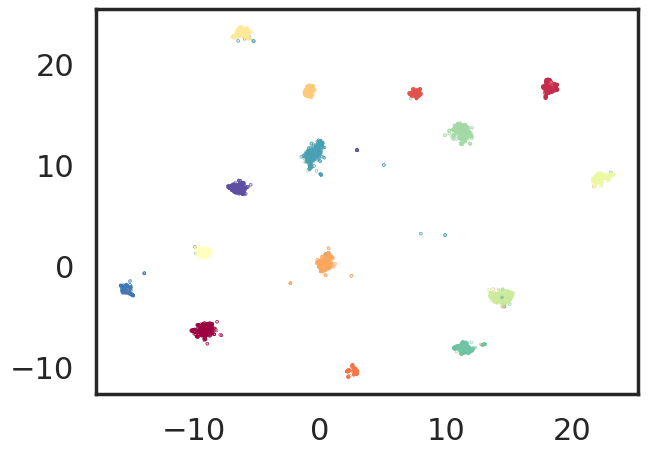

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='poster')

fig, ax = plt.subplots(1, figsize=(7, 5))
plt.scatter(*features2D.T, s=0.1, c=df_sample.cluster.to_list(), cmap='Spectral', alpha=1.0)

In [ ]:
# agora vamos utilizar uma LLM para nos ajudar a interpretar os clusters de posts



In [ ]:
!pip install openai==0.28
# aproveitamos o mesmo protocolo de comunicacao da OpenAi, mas o modelo nao eh o ChatGPT

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.84.0
    Uninstalling openai-1.84.0:
      Successfully uninstalled openai-1.84.0


In [ ]:
from getpass import getpass
import openai

def llm_local():
  modo_local = input("Deseja usar uma LLM local? (s/n): ").strip().lower()

  if modo_local == 's':
      # Configuração para Ollama local
      openai.api_base = "http://localhost:11434/v1"
      openai.api_key = "ollama"  # Requerido por algumas bibliotecas mesmo que não usado
  else:
      # Configuração para OpenAI
      openai.api_base = "https://api.openai.com/v1"
      openai.api_key = getpass("Digite sua chave de API da OpenAI: ")

llm_local()

Deseja usar uma LLM local? (s/n): s


In [ ]:
import json
import openai

def llm_task(model, system, prompt):
  response = openai.ChatCompletion.create(
      model=model,
      messages = [
            {
              "role": "system",
              "content": system
            },
            {
              "role": "user",
              "content": prompt
            },
          ]

  )
  s = response['choices'][0]['message']['content'].strip()

  return s

# Instalando uma LLM Local (Ollama)

https://ollama.com


In [ ]:
# baixando e instalando o ollama
!curl -fsSL https://ollama.com/install.sh | sh
!pip install ollama
!nohup ollama serve &

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
nohup: appending output to 'nohup.out'


In [ ]:
# ativando o servidor de LLM
!nohup ollama serve &

nohup: appending output to 'nohup.out'


In [ ]:
# baixando uma LLM (llama3.1)
!ollama pull llama3.1

#### Usando a LLM local

In [ ]:
llm_local()

Deseja usar uma LLM local? (s/n): s


In [ ]:
system = '''
Você é um analista de posts em redes sociais.
A partir de uma lista de posts, você deve:
1) identificar o tema geral dos posts
2) identificar os tópicos mais relevantes nos posts.
3) cada tópico deve ser formado 2 ou 3 palavras
4) sumarizar posts positivos e negativos
5) Apresentar um breve resumo dos posts
A saída da análise deve ser estruturada em JSON.

Exemplo de Estrutura do JSON:

```json
{
  "tema_geral": "texto do tema geral",
  "topicos_relevantes": ["topico A","topico B","topico C"],
  "resumo_positivo": "resumir posts positivos",
  "resumo_negativo": "resumir posts negativos"
}
```

A resposta deve ser em português e APENAS EM JSON.
Não retorne nada além do JSON.
'''





In [ ]:
df.sample(10)

,anon_id,content,reactions,comments,score,engagement,features,cluster
14537,d98adf61c86b3074fc0cdaf23cf1b4be,Glad to be back at the World Economic Forum’s ...,71,1,72,low,"[0.02926857, -0.025179192, -0.02820827, 0.0145...",1
11372,8bf50b463fb42a05b3cc3ae18440fd58,📖 When someone says a book changed their life ...,7,1,8,low,"[-0.10689894, 0.06591982, 0.004145961, 0.05837...",7
455,77901948fa3fd3f76a00e6aa7d704e88,"Recently, at a child care center in Okinawa, t...",10,0,10,low,"[-0.060280647, 0.03662163, 0.040447176, 0.0543...",7
10354,57c3606d8c2045ee4d12e5bda3bc00c0,490th #1Mby1M #Entrepreneurship #Podcast ...,7,0,7,low,"[0.041312132, -0.028396523, -0.045804348, -0.0...",11
17332,43cc3504ff48ea6c1be33830a800761e,#Disruption is the holy grail in the startup ...,36,2,38,low,"[0.042433728, -0.0900101, 0.034583252, -0.0179...",11
2055,96ccc6fdf97b890e2d0187c620bd6d57,It's Time To Look At Suicide Squarely In The E...,63,9,72,low,"[0.04464571, 0.019493004, -0.031090517, -0.022...",14
8500,e9a5747880379170a53a736ba79282ee,COME LAUGH AT ME: Tonight I'm doing standup a...,733,55,788,high,"[-0.0023032431, -0.02606171, 0.046177424, -0.0...",14
16518,95333d14cb84443736fd874c4efb3339,We're live with Carla Johnson! I've got questi...,11,0,11,low,"[-0.03222994, -0.052295946, 0.05962925, -0.003...",0
20609,5a3e559348d12bd6597d3c4ea5dfbc3b,Please consider supporting Independent booksho...,4,0,4,low,"[0.002766438, -0.017816886, 0.01606749, 0.0178...",7
18595,c914716d05361611c1ec52ae6675cee0,Wahoowa! UVA Law Ranked #2!,10,0,10,low,"[-0.040473755, 0.030526815, 0.0017598158, 0.01...",3


In [ ]:
import json

L = []
for cluster in range(0,9):
  print("Gerando analise do cluster",cluster)
  prompt = ''
  df_temp = df[df.cluster == cluster].sample(10)
  for index,row in df_temp.iterrows():
    prompt += f'#Post: {row.content} ####\n\n\n'
  resposta = llm_task("llama3.1",system,prompt)
  print(resposta)
  json_str = resposta.replace("```json","").replace("```","")
  print(json_str)
  obj = json.loads(json_str)
  print(obj)
  df_temp['tema_geral'] = obj['tema_geral']
  df_temp['topicos_relevantes'] = str(list(obj['topicos_relevantes']))
  df_temp['resumo_positivo'] = obj['resumo_positivo']
  df_temp['resumo_negativo'] = obj['resumo_negativo']
  L.append(df_temp)
  print("======")


Gerando analise do cluster 0
```json
{
  "tema_geral": "Produtividade e Bem-Estar",
  "topicos_relevantes": [
    "Gerenciamento do Tempo",
    "Saúde Mental",
    "Benefícios para Empregados",
    "Autonomia no Trabalho",
    "Desenvolvimento Pessoal"
  ],
  "resumo_positivo": "Posts oferecem dicas e estratégias para gerenciar tempo, melhorar saúde mental, aumentar produtividade e desenvolver habilidades.",
  "resumo_negativo": "Posts abordam sentimentos de arrependimento e desmotivação que os trabalhadores experimentam ao retornar do feriado."
}
```

{
  "tema_geral": "Produtividade e Bem-Estar",
  "topicos_relevantes": [
    "Gerenciamento do Tempo",
    "Saúde Mental",
    "Benefícios para Empregados",
    "Autonomia no Trabalho",
    "Desenvolvimento Pessoal"
  ],
  "resumo_positivo": "Posts oferecem dicas e estratégias para gerenciar tempo, melhorar saúde mental, aumentar produtividade e desenvolver habilidades.",
  "resumo_negativo": "Posts abordam sentimentos de arrependimento 

In [ ]:
df_clusters = pd.concat(L)
df_clusters

,anon_id,content,reactions,comments,score,engagement,features,cluster,tema_geral,topicos_relevantes,resumo_positivo,resumo_negativo
13267,4cac481e40d95a8508829e56d99c1f0f,Want to see how you are investing your time? C...,16,0,16,low,"[-0.019861462, 0.015255875, 0.045717105, 0.055...",0,Produtividade e Bem-Estar,"['Gerenciamento do Tempo', 'Saúde Mental', 'Be...",Posts oferecem dicas e estratégias para gerenc...,Posts abordam sentimentos de arrependimento e ...
1963,96ccc6fdf97b890e2d0187c620bd6d57,Back to Work Blues? It’s a Real Thing. It’s Mo...,11,2,13,low,"[-0.010516907, -0.026946964, 0.017662175, 0.10...",0,Produtividade e Bem-Estar,"['Gerenciamento do Tempo', 'Saúde Mental', 'Be...",Posts oferecem dicas e estratégias para gerenc...,Posts abordam sentimentos de arrependimento e ...
4195,fe7849ebce9a195157a951772e5da70c,For as little as $12 per year you can offer em...,6,0,6,low,"[-0.05945056, 0.055387016, 0.025072519, 0.0272...",0,Produtividade e Bem-Estar,"['Gerenciamento do Tempo', 'Saúde Mental', 'Be...",Posts oferecem dicas e estratégias para gerenc...,Posts abordam sentimentos de arrependimento e ...
13037,4cac481e40d95a8508829e56d99c1f0f,I'm working on my second book and need YOUR he...,52,5,57,low,"[0.011080521, -0.0035644204, 0.01738991, 0.006...",0,Produtividade e Bem-Estar,"['Gerenciamento do Tempo', 'Saúde Mental', 'Be...",Posts oferecem dicas e estratégias para gerenc...,Posts abordam sentimentos de arrependimento e ...
12857,4cac481e40d95a8508829e56d99c1f0f,The Lies We Tell Ourselves: What’s Holding you...,22,2,24,low,"[-0.088447094, 0.08201768, 0.036798626, 0.0398...",0,Produtividade e Bem-Estar,"['Gerenciamento do Tempo', 'Saúde Mental', 'Be...",Posts oferecem dicas e estratégias para gerenc...,Posts abordam sentimentos de arrependimento e ...
...,...,...,...,...,...,...,...,...,...,...,...,...
3586,6dd12a8b69751cd80f9a645d42dcc49c,From Rethink Robotics shutting down to Boston ...,26,0,26,low,"[0.010649015, -0.07260365, 0.013459969, -0.018...",8,Tecnologia e Empreendedorismo,"['Startup', 'Investimento', 'Empreendedorismo']","Muitas oportunidades de negócios e crescentes,...",Desafios na gestão de processos e busca por fu...
10630,57c3606d8c2045ee4d12e5bda3bc00c0,How do you ensure a high success potential for...,2,0,2,low,"[-0.043769762, -0.08728897, 0.029533425, -0.05...",8,Tecnologia e Empreendedorismo,"['Startup', 'Investimento', 'Empreendedorismo']","Muitas oportunidades de negócios e crescentes,...",Desafios na gestão de processos e busca por fu...
10947,57c3606d8c2045ee4d12e5bda3bc00c0,3 #Seed #Investors discuss #European #s...,11,0,11,low,"[0.014474083, -0.06796865, -0.025835508, -0.01...",8,Tecnologia e Empreendedorismo,"['Startup', 'Investimento', 'Empreendedorismo']","Muitas oportunidades de negócios e crescentes,...",Desafios na gestão de processos e busca por fu...
9840,57c3606d8c2045ee4d12e5bda3bc00c0,1Mby1M Virtual #Accelerator #Investor Foru...,2,0,2,low,"[0.0006771695, -0.062216815, -0.06358209, -0.0...",8,Tecnologia e Empreendedorismo,"['Startup', 'Investimento', 'Empreendedorismo']","Muitas oportunidades de negócios e crescentes,...",Desafios na gestão de processos e busca por fu...


In [ ]:
df_clusters[['content','tema_geral','topicos_relevantes']]

,content,tema_geral,topicos_relevantes
13267,Want to see how you are investing your time? C...,Produtividade e Bem-Estar,"['Gerenciamento do Tempo', 'Saúde Mental', 'Be..."
1963,Back to Work Blues? It’s a Real Thing. It’s Mo...,Produtividade e Bem-Estar,"['Gerenciamento do Tempo', 'Saúde Mental', 'Be..."
4195,For as little as $12 per year you can offer em...,Produtividade e Bem-Estar,"['Gerenciamento do Tempo', 'Saúde Mental', 'Be..."
13037,I'm working on my second book and need YOUR he...,Produtividade e Bem-Estar,"['Gerenciamento do Tempo', 'Saúde Mental', 'Be..."
12857,The Lies We Tell Ourselves: What’s Holding you...,Produtividade e Bem-Estar,"['Gerenciamento do Tempo', 'Saúde Mental', 'Be..."
...,...,...,...
3586,From Rethink Robotics shutting down to Boston ...,Tecnologia e Empreendedorismo,"['Startup', 'Investimento', 'Empreendedorismo']"
10630,How do you ensure a high success potential for...,Tecnologia e Empreendedorismo,"['Startup', 'Investimento', 'Empreendedorismo']"
10947,3 #Seed #Investors discuss #European #s...,Tecnologia e Empreendedorismo,"['Startup', 'Investimento', 'Empreendedorismo']"
9840,1Mby1M Virtual #Accelerator #Investor Foru...,Tecnologia e Empreendedorismo,"['Startup', 'Investimento', 'Empreendedorismo']"


Aqui está a análise no formato JSON:

```json
{
  "tema_geral": "Tecnologia e Saúde",
  "tópicos_relevantes": [
    "Inovação em Saúde",
    "Impacto da COVID-19",
    "Digitalização na Saúde"
  ],
  "resumo_positivo": "Os posts destacam a importância de tecnologias como telemedicina, drones e testes em casa para melhorar a saúde pública. Além disso, apresenta uma visão de como o futuro da saúde seria ideal.",
  "resumo_negativo": "Alguns posts criticam o fato de que essas inovações não estão tendo impacto significativo na pandemia da COVID-19 e pedem mais imaginação e pensamento crítico nos empreendimentos."
}
```

E aqui está um resumo dos postagens identificadas:

### Inovação em Saúde

*   A.I. pode forecasting avançados de surtos;
*   Telemedicina reduz contato desnecessário e risco de contágio;
*   Drones já podem entregar medicamentos;
*   Testes em casa estão disponíveis para várias doenças.

### Impacto da COVID-19

*   A pandemia da COVID-19 mostra que ainda falta impacto sig

## **Atividade 3 — Desenvolvimento de um Agente Criativo para Geração de Postagens Engajadas**

Esta é uma atividade **aberta à criatividade dos alunos**. O desafio consiste em desenvolver um **agente inteligente** que utilize **modelos de aprendizado profundo ou inteligência artificial generativa** para **auxiliar na criação de postagens com maior potencial de engajamento**.

Esse agente pode explorar:

* Análise de características de postagens com alto engajamento
* Reescrita ou sugestão de novos textos com base em um post inicial
* Combinação de diferentes abordagens estudadas ao longo da disciplina

